In [1]:
%matplotlib notebook

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
userpath = os.path.expanduser('~')
onedrivepath = os.path.join(userpath.replace('C:', 'D:'), r'OneDrive - Transport Systems Catapult')
infolder = r'../Data/Accidents'

In [4]:
infile = r'Accidents_2015.csv'
infilepath = os.path.join(infolder, infile)

In [5]:
df_raw = pd.read_csv(infilepath, index_col=0)

C:\Users\haris.ballis\.conda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Create datetime col
datetime = pd.to_datetime(df_raw.Date + ' ' + df_raw.Time)
df_raw.insert(1, 'Datetime', datetime)
df_raw.drop(['Date', 'Time'], axis=1, inplace=True)

In [7]:
df_raw.head(2)

,Location_Easting_OSGR,Datetime,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
201501BS70001,525130.0,2015-12-01 18:45:00,180050.0,-0.198465,51.505538,1,3,1,1,2,...,0,0,4,1,1,0,0,1,1,E01002825
201501BS70002,526530.0,2015-12-01 07:50:00,178560.0,-0.178838,51.491836,1,3,1,1,2,...,0,0,1,1,1,0,0,1,1,E01002820


In [8]:
infile = r'stats19_metadata.xls'
infilepath = os.path.join(infolder, infile)

In [9]:
metadata = pd.read_excel(infilepath, sheetname=None)
# Consistency between metadata keys and df columns
metadata = dict((k.replace(' ', '_'), v) for k,v in metadata.items())

In [10]:
boundaries = {}
boundaries['OA'] = pd.read_csv(r'D:\Users\haris.ballis\Transport Systems Catapult\Modelling Data - Documents\GIS\Boundaries\Lookups\OA\OA11_LSOA11_MSOA11_LAD11_EW_LUv2.csv',
                               encoding='ISO-8859-1', index_col=0)


C:\Users\haris.ballis\.conda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
boundaries['LSOA'] = boundaries['OA'].groupby('LSOA11CD').first()

In [12]:
df = df_raw.copy()
for c in df:
    if c in metadata:
        d = metadata[c]
        s = d.set_index(d.columns[0]).squeeze()
        df[c] = df[c].replace(s)
        df[c] = df[c].astype('category')

In [13]:
d = boundaries['LSOA']
df = df.join(d.RGN16NM, on='LSOA_of_Accident_Location')

In [14]:
cols = ['Datetime', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Accident_Severity', 'Number_of_Vehicles',
        'Number_of_Casualties', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class',
        '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', '2nd_Road_Class', '2nd_Road_Number',
        'Urban_or_Rural_Area', 'LSOA_of_Accident_Location']

In [15]:
dft = df[cols]

In [16]:
dft.columns = ['Datetime', 'Easting', 'Northing', 'Accident_Severity', 'No_Vehicles',
        'No_Casualties', 'LA_District', 'LA_Highway', 'Road_Class_1',
        'Road_Number_1', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Road_Class_2', 'Road_Number_2',
        'Urban_or_Rural_Area', 'LSOA']

In [17]:
t = dft.groupby(by=[dft.Road_Class_1, dft.Road_Number_1])['No_Vehicles'].count()

<IPython.core.display.Javascript object>


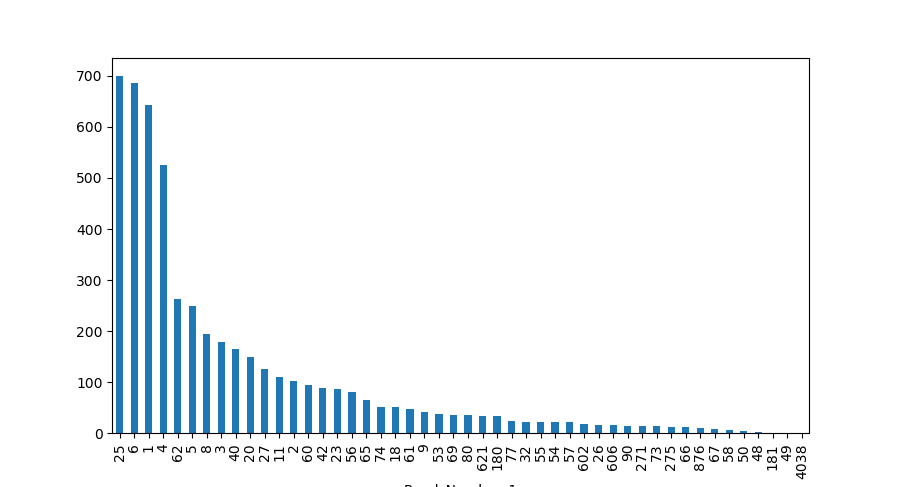

In [22]:
t.xs('Motorway', level=0, drop_level=True).sort_values(ascending=False).plot.bar()

In [21]:
df.to_clipboard()